In [26]:
# Importing necessary libraries

import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt   
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Rectangle
from sklearn.decomposition import PCA

In [27]:
# Importing the data

CZ = pd.read_csv('cubic_zirconia.csv')

##### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

##### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [174]:
# Dimensions of the data:

print('\033[1m','Total number of observations: ','\033[0m', CZ.shape[0])
print("")
print('\033[1m','Total number of Features: ','\033[0m', CZ.shape[1])

 Total number of observations:   26967

 Total number of Features:   11


In [176]:
# Checking for any duplicates with Unique ID

print('\033[1m','Number of duplicates',CZ.duplicated().sum())

 Number of duplicates 0


In [30]:
CZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [31]:
# Overview of first 10 observations:

CZ.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [32]:
# Overview of last 10 observations:

CZ.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26957,26958,2.09,Premium,H,SI2,60.6,59.0,8.27,8.22,5.00,17805
26958,26959,1.37,Premium,E,SI2,61.0,57.0,7.25,7.19,4.40,6751
26959,26960,1.05,Very Good,E,SI2,63.2,59.0,6.43,6.36,4.04,4281
26960,26961,1.10,Very Good,D,SI2,NaN,63.0,6.76,6.69,3.94,4361
26961,26962,0.25,Premium,F,VVS2,62.0,59.0,4.04,3.99,2.49,740
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [65]:
# Data description: Numerical features only:
print('')
CZ.describe().iloc[:,1:].T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [34]:
# Data description: Categorical features only:

CZ.describe(include='object').T

,count,unique,top,freq
cut,26967,5,Ideal,10816
color,26967,7,G,5661
clarity,26967,8,SI1,6571


In [35]:
print('\033[1m','Unique counts of Nominal columns:','\033[0m')
print("")
for i in CZ[['cut','clarity','color']]:
    print(pd.DataFrame(round(CZ[['cut','clarity','color']][i].value_counts(normalize=True)*100,2)))
    print("-----------------")
    print(" ")

 Unique counts of Nominal columns: 

             cut
Ideal      40.11
Premium    25.58
Very Good  22.36
Good        9.05
Fair        2.90
-----------------
 
      clarity
SI1     24.37
VS2     22.62
SI2     16.97
VS1     15.18
VVS2     9.39
VVS1     6.82
IF       3.32
I1       1.35
-----------------
 
   color
G  20.99
E  18.23
F  17.54
H  15.21
D  12.40
I  10.28
J   5.35
-----------------
 


In [36]:
df_cz = CZ.copy()

In [37]:
# The rows with zero in x,y and z columns
CZ[CZ['z'] ==0]
# This also includes the null values in x and y together

df_cz.drop(index=[5821,6215,17506,6034,10827,12498,12689,18194,23758],axis=0,inplace=True)

In [38]:
# The y(width) does not match with x and z
CZ[CZ['y'] > 20]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
25795,25796,2.0,Premium,H,SI2,58.9,57.0,8.09,58.9,8.06,12210


In [39]:
# The z(height) does not match with x and y
CZ[CZ['z'] >20]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
344,345,0.51,Very Good,E,VS1,NaN,54.7,5.12,5.15,31.8,1970


In [40]:
df_cz.drop(index=[25795,344],axis=0,inplace=True)

In [41]:
# Dropping the unwanted column:

df_cz = df_cz.drop(['Unnamed: 0'],axis=1)

#### Null values treatment:

In [60]:
# an observation with null value:

df_cz[df_cz.index == 26]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.5,4.44,2.74,803


* Depth = z/y *100 ==> height / width *100
* Null values in depth are replaced using the above method. 

In [61]:
df_cz['depth'].fillna((df_cz['z']/df_cz['y'])*100,inplace=True)

In [62]:
# Observation after null values treatment

df_cz[df_cz.index == 26]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,61.711712,57.0,4.5,4.44,2.74,803


##### Summary of Overview of the data:

1. There are 26967 observations and 10 features excl the Unnamed column.
2. Duplicates are found without the unique Id column. A sale of two cz diamonds can have similar features. So no duplicates dropped.
3. The Categorical columns does not have any anomalies.
4. Only 9.88% of the observations have prices more than 10000.
5. 9 rows in has zero in x,y and z. They are dropped
6. The maximum values in y and z are seems to be an incorrect outlier. They are dropped.
7. The null values in the depth feature are imputed using the height/width *100 formula.

#### Feature analysis:

1. Structural Multicollinearity: Between x,y and z. The depth feature is generated by using z/y*100. Hence z and y can be removed as all the information from these features are captured by Depth feature itself.

#### Outliers Treatment

<AxesSubplot:xlabel='z'>

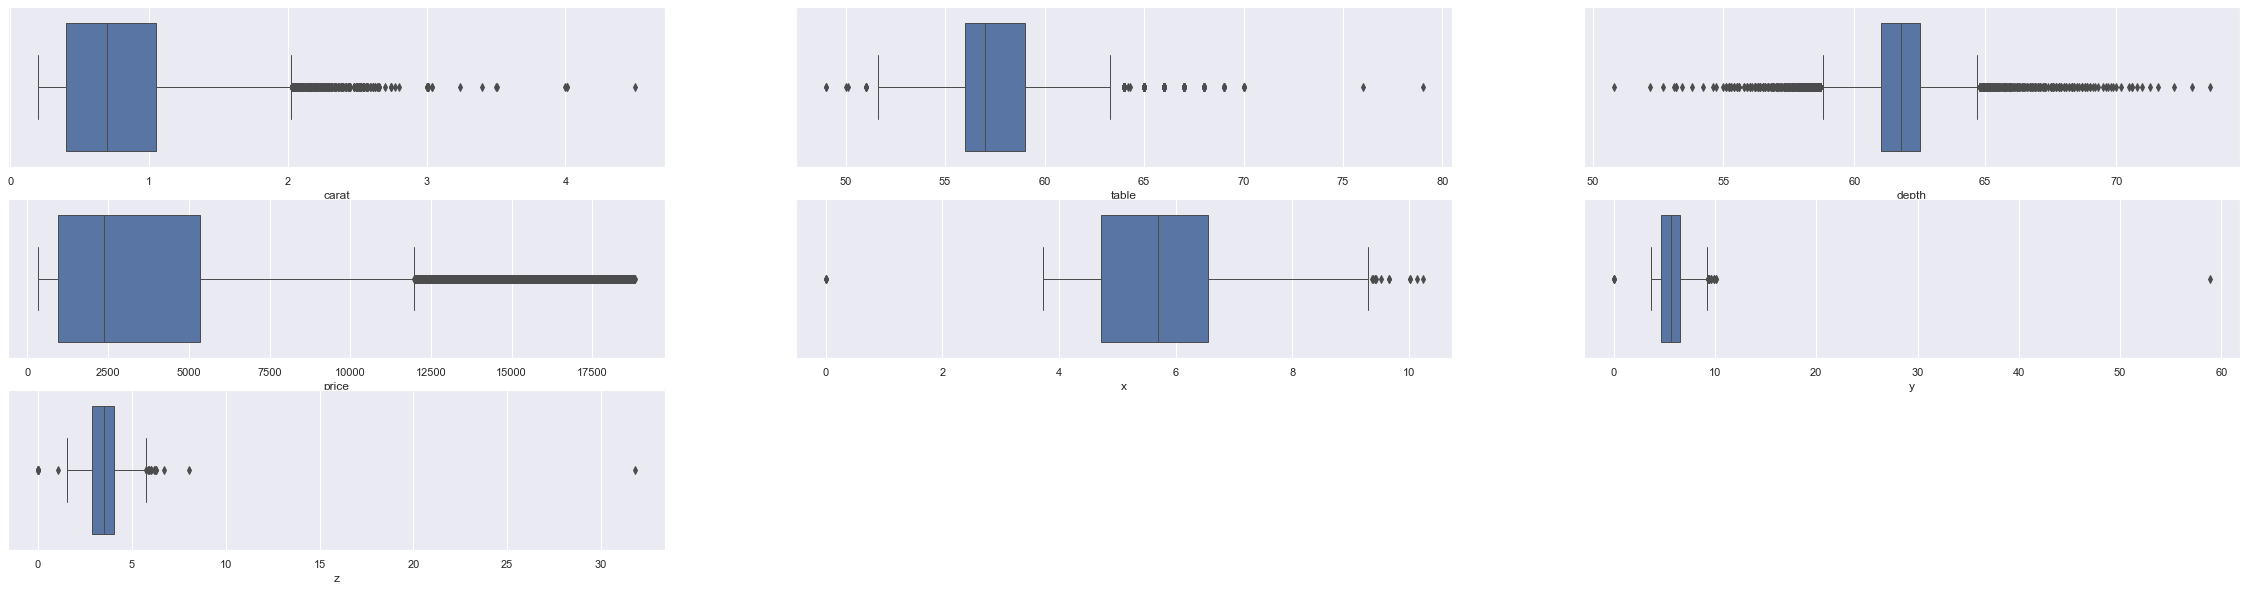

In [179]:
plt.figure(figsize=(40,10))
plt.subplot(3,3,1)
sns.boxplot(x=CZ['carat'],linewidth=1)

plt.subplot(3,3,2)
sns.boxplot(x=CZ['table'],linewidth=1)

plt.subplot(3,3,3)
sns.boxplot(x=CZ['depth'],linewidth=1)

plt.subplot(3,3,4)
sns.boxplot(x=CZ['price'],linewidth=1)

plt.subplot(3,3,5)
sns.boxplot(x=CZ['x'],linewidth=1)

plt.subplot(3,3,6)
sns.boxplot(x=CZ['y'],linewidth=1)

plt.subplot(3,3,7)
sns.boxplot(x=CZ['z'],linewidth=1)

In [68]:
# Function to calculate lower_range and upper_range
def Outlier_ur_lr(column):
    sorted(column)
    Q1,Q3=np.percentile(column,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [69]:
lr,ur=Outlier_ur_lr(df_cz['depth'])
df_cz['depth']=np.where(df_cz['depth']>ur,ur,df_cz['depth'])
df_cz['depth']=np.where(df_cz['depth']<lr,lr,df_cz['depth'])

In [70]:
lr,ur=Outlier_ur_lr(df_cz['table'])
df_cz['table']=np.where(df_cz['table']>ur,ur,df_cz['table'])
df_cz['table']=np.where(df_cz['table']<lr,lr,df_cz['table'])

In [71]:
lr,ur=Outlier_ur_lr(df_cz['x'])
df_cz['x']=np.where(df_cz['x']>ur,ur,df_cz['x'])

In [72]:
lr,ur=Outlier_ur_lr(df_cz['y'])
df_cz['y']=np.where(df_cz['y']>ur,ur,df_cz['y'])

In [73]:
lr,ur=Outlier_ur_lr(df_cz['z'])
df_cz['z']=np.where(df_cz['z']>ur,ur,df_cz['z'])
df_cz['z']=np.where(df_cz['z']<lr,lr,df_cz['z'])

In [74]:
# Carat:

print('The upper range of carat:', Outlier_ur_lr(df_cz['carat'])[1])
print('Percentage of data less than or equal to 2.5 Carat: ',
      round((df_cz[df_cz['carat'] <= 2.5].count()[0]/df_cz['carat'].shape[0]*100),4),'%')
print('Percentage of data more than 2.5 Carat: ',
      round((df_cz[df_cz['carat'] > 2.5].count()[0]/df_cz['carat'].shape[0]*100),2),'%')

print('Number of observations with more than 2.5 carats:',df_cz[df_cz['carat'] >2.5].count()[0],'observations')

The upper range of carat: 2.0250000000000004
Percentage of data less than or equal to 2.5 Carat:  99.7403 %
Percentage of data more than 2.5 Carat:  0.26 %
Number of observations with more than 2.5 carats: 70 observations


In [80]:
# Dataframe with only carat values less than and equal to 2.5 is created
df = df_cz[df_cz['carat'] <=2.5]

In [81]:
# New Dimensions of the data:

print('Total number of observations: ', df.shape[0])
print("")
print('Total number of Features: ', df.shape[1])

Total number of observations:  26886

Total number of Features:  10


#### EDA and Data Visualization:

##### Skewness, Kurtosis and Coefficient of Variance%

In [82]:
# creating a separate dataframe for EDA
df_EDA = df.copy()

In [83]:
Numerical = df_EDA.select_dtypes(['int64','float64'])

Discrete = df_EDA.select_dtypes('object')

In [84]:
for i in Numerical:
    print('The Coefficient of Variance for the column',i, 'is ',
          round((Numerical[i].std()/Numerical[i].mean())*100),'%')

The Coefficient of Variance for the column carat is  59 %
The Coefficient of Variance for the column depth is  2 %
The Coefficient of Variance for the column table is  4 %
The Coefficient of Variance for the column x is  20 %
The Coefficient of Variance for the column y is  19 %
The Coefficient of Variance for the column z is  20 %
The Coefficient of Variance for the column price is  102 %


In [85]:
for i in Numerical:
    if Numerical[i].skew() <= .51:
        print('Skewness for',i,round(Numerical[i].skew(),4),'it is approx symmetrical')
    elif Numerical[i].skew() > 1.1:
        print('Skewness for',i,round(Numerical[i].skew(),4),'it is extremely skewed')
    else:
        print('Skewness for',i,round(Numerical[i].skew(),4),'it is slightly skewed')

Skewness for carat 0.9993 it is slightly skewed
Skewness for depth -0.2289 it is approx symmetrical
Skewness for table 0.4819 it is approx symmetrical
Skewness for x 0.3727 it is approx symmetrical
Skewness for y 0.3694 it is approx symmetrical
Skewness for z 0.3663 it is approx symmetrical
Skewness for price 1.6205 it is extremely skewed


In [86]:
for i in Numerical:
    if Numerical[i].kurtosis() < 3:
        print('Kurtosis for',i, ':',round(Numerical[i].kurtosis(),4),
              'Platykurtic - kurtosis less than normal distribution')
    elif Numerical[i].skew() == 3:
        print('Kurtosis for',i, ':',round(Numerical[i].kurtosis(),4),'it is a Mesokurtic kurtosis')
    else:
        print('Kurtosis for',i, ':',round(Numerical[i].kurtosis(),4),
              'Leptokurtic - kurtosis more than normal distribution')

Kurtosis for carat : 0.5058 Platykurtic - kurtosis less than normal distribution
Kurtosis for depth : 0.1721 Platykurtic - kurtosis less than normal distribution
Kurtosis for table : -0.0102 Platykurtic - kurtosis less than normal distribution
Kurtosis for x : -0.8114 Platykurtic - kurtosis less than normal distribution
Kurtosis for y : -0.8166 Platykurtic - kurtosis less than normal distribution
Kurtosis for z : -0.8149 Platykurtic - kurtosis less than normal distribution
Kurtosis for price : 2.1811 Platykurtic - kurtosis less than normal distribution


#### Univariate Analysis: Numerical Columns

In [93]:
def Univariate_analysis_num(column,bins):
    
    plt.figure(figsize=(35,5))
    plt.subplot(1,2,1)
    print(" ")
    print('\033[1m',"Histogram and Boxplot for the " +column,"column",'\033[0m')
    
    sns.histplot(Numerical[column],kde=True,color='k',bins=20,palette='magma')
    plt.subplot(1,2,2)
    sns.boxplot(x=Numerical[column],saturation=2,whis=2,linewidth=2,palette='magma')
    plt.show()

 
 Histogram and Boxplot for the carat column 


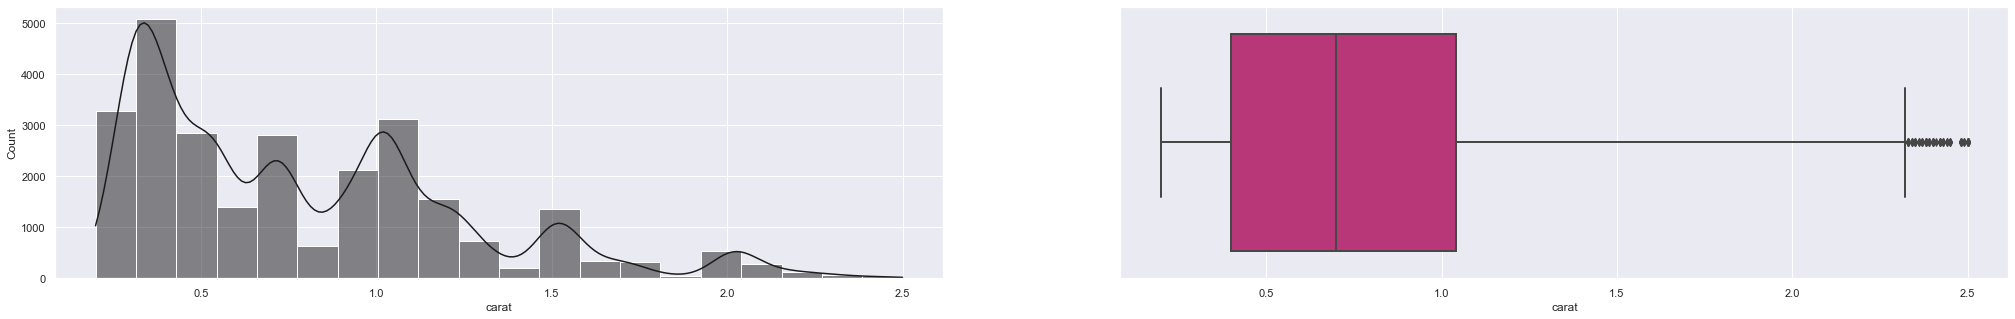

 
 Histogram and Boxplot for the depth column 


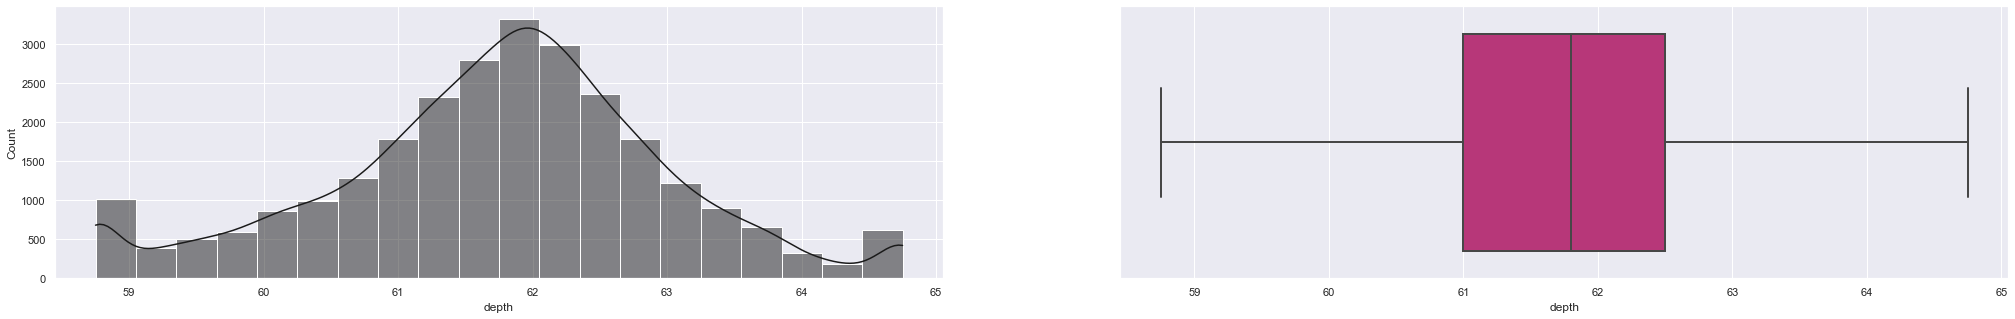

 
 Histogram and Boxplot for the table column 


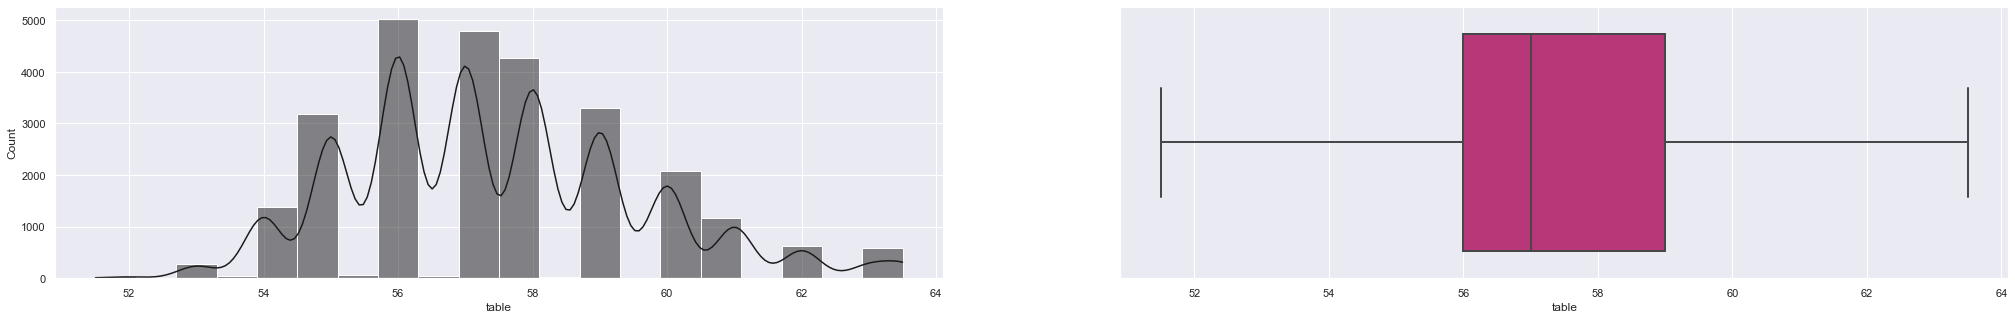

 
 Histogram and Boxplot for the x column 


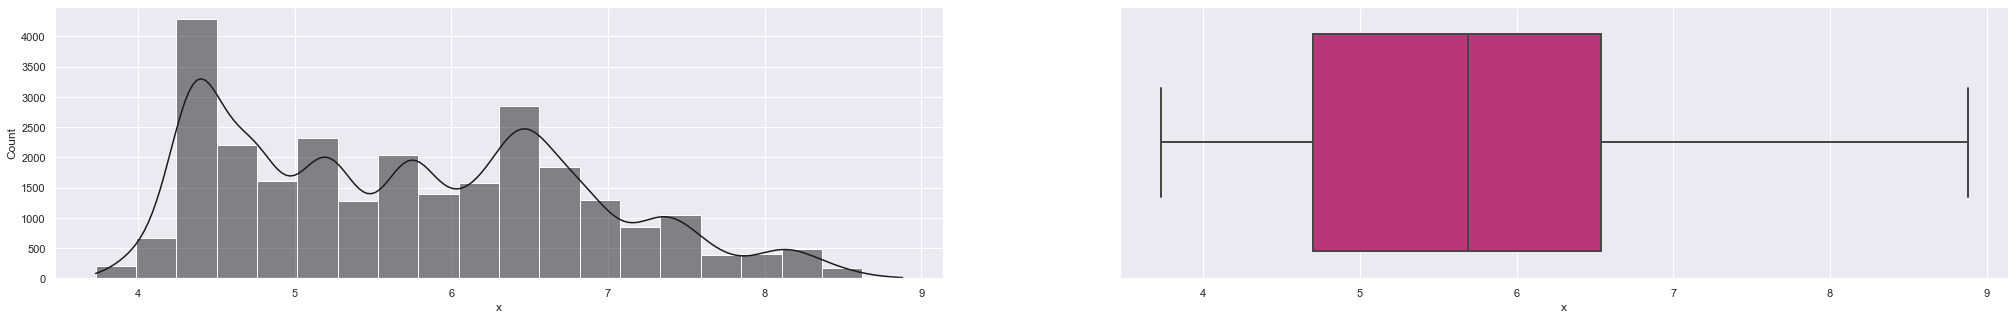

 
 Histogram and Boxplot for the y column 


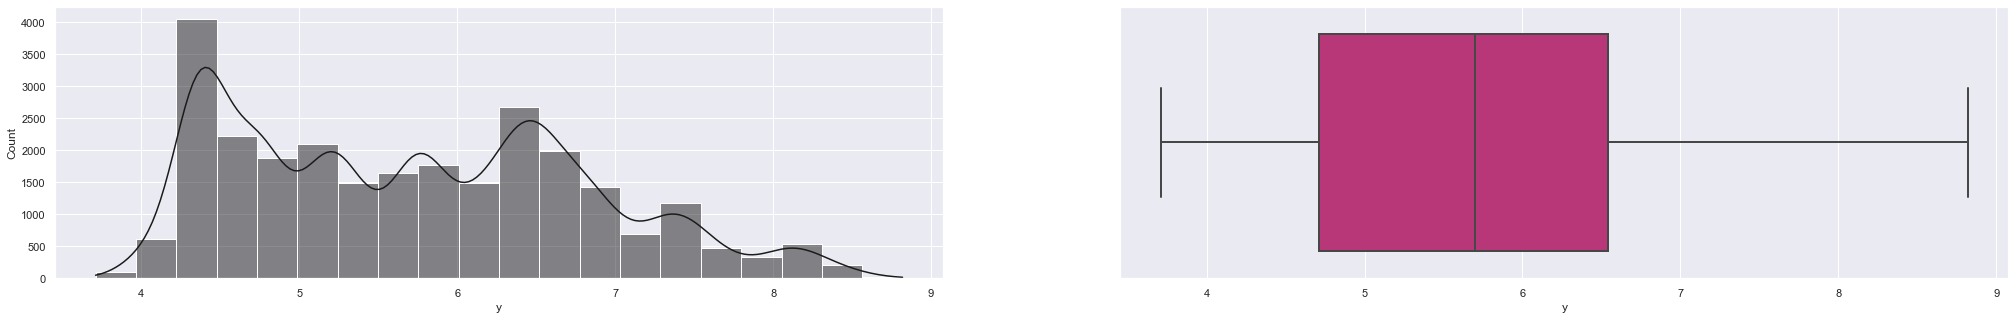

 
 Histogram and Boxplot for the z column 


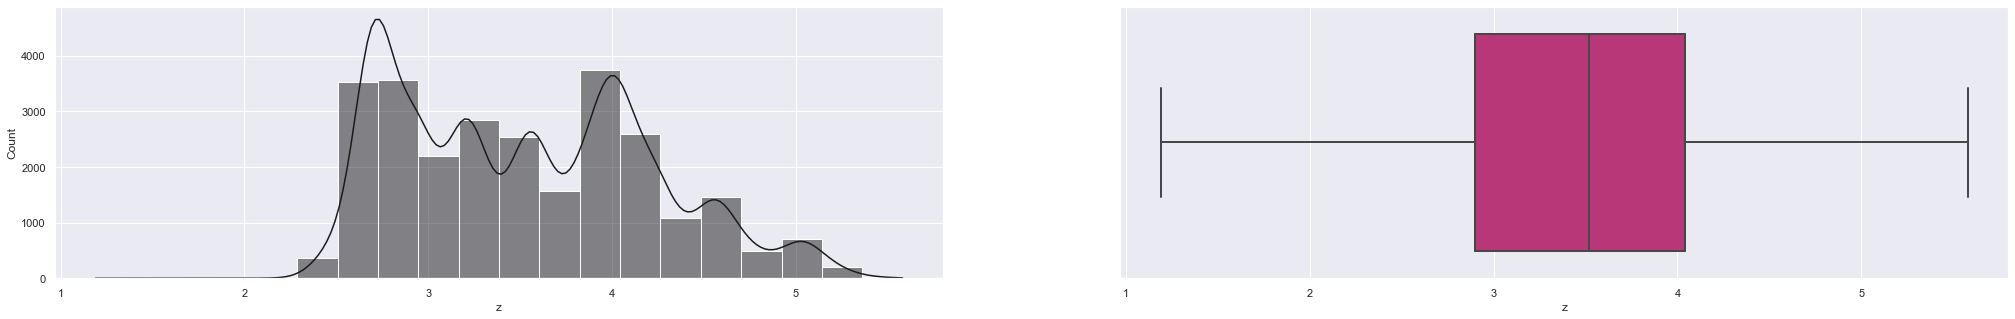

 
 Histogram and Boxplot for the price column 


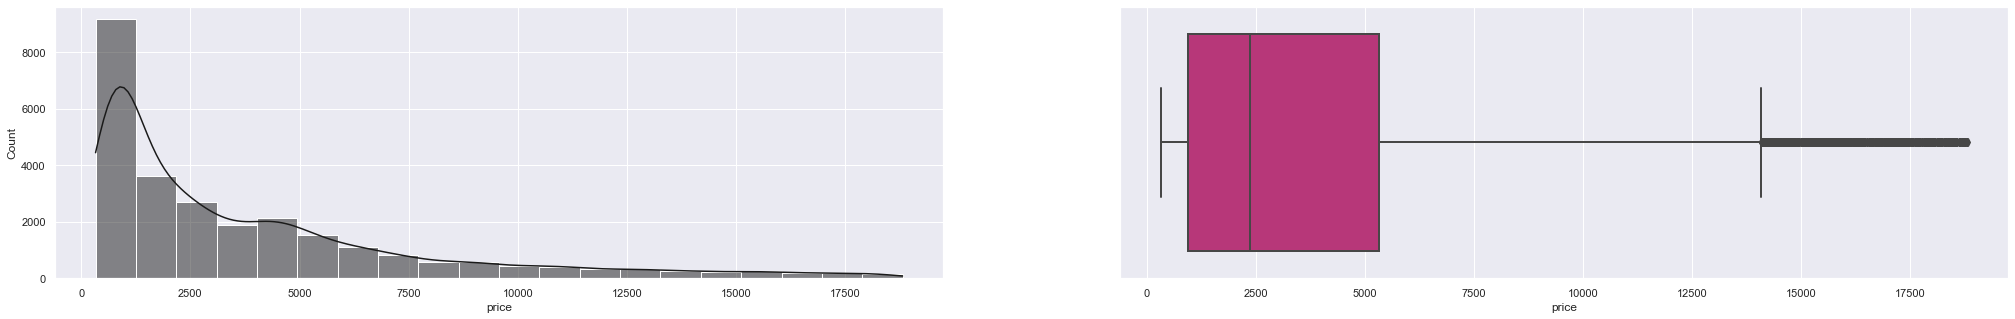

In [94]:
for i in Numerical:
    Univariate_analysis_num(i,20)

#### Univariate Analysis: Discrete Columns

 Countplot for the Discrete features 


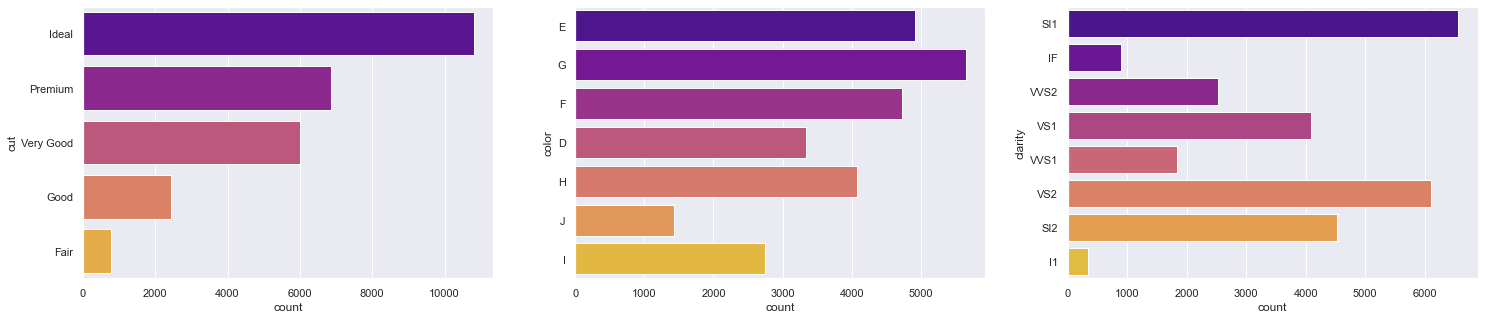

In [99]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
print('\033[1m',"Countplot for the Discrete features",'\033[0m')
sns.countplot(y=df['cut'],palette='plasma')
plt.subplot(1,3,2)
sns.countplot(y=df['color'],palette='plasma')
plt.subplot(1,3,3)
sns.countplot(y=df['clarity'],palette='plasma')
plt.show()

#### Bi-variate Analysis: 

  Bivariate Analysis: Pairplot for the Numerical features 


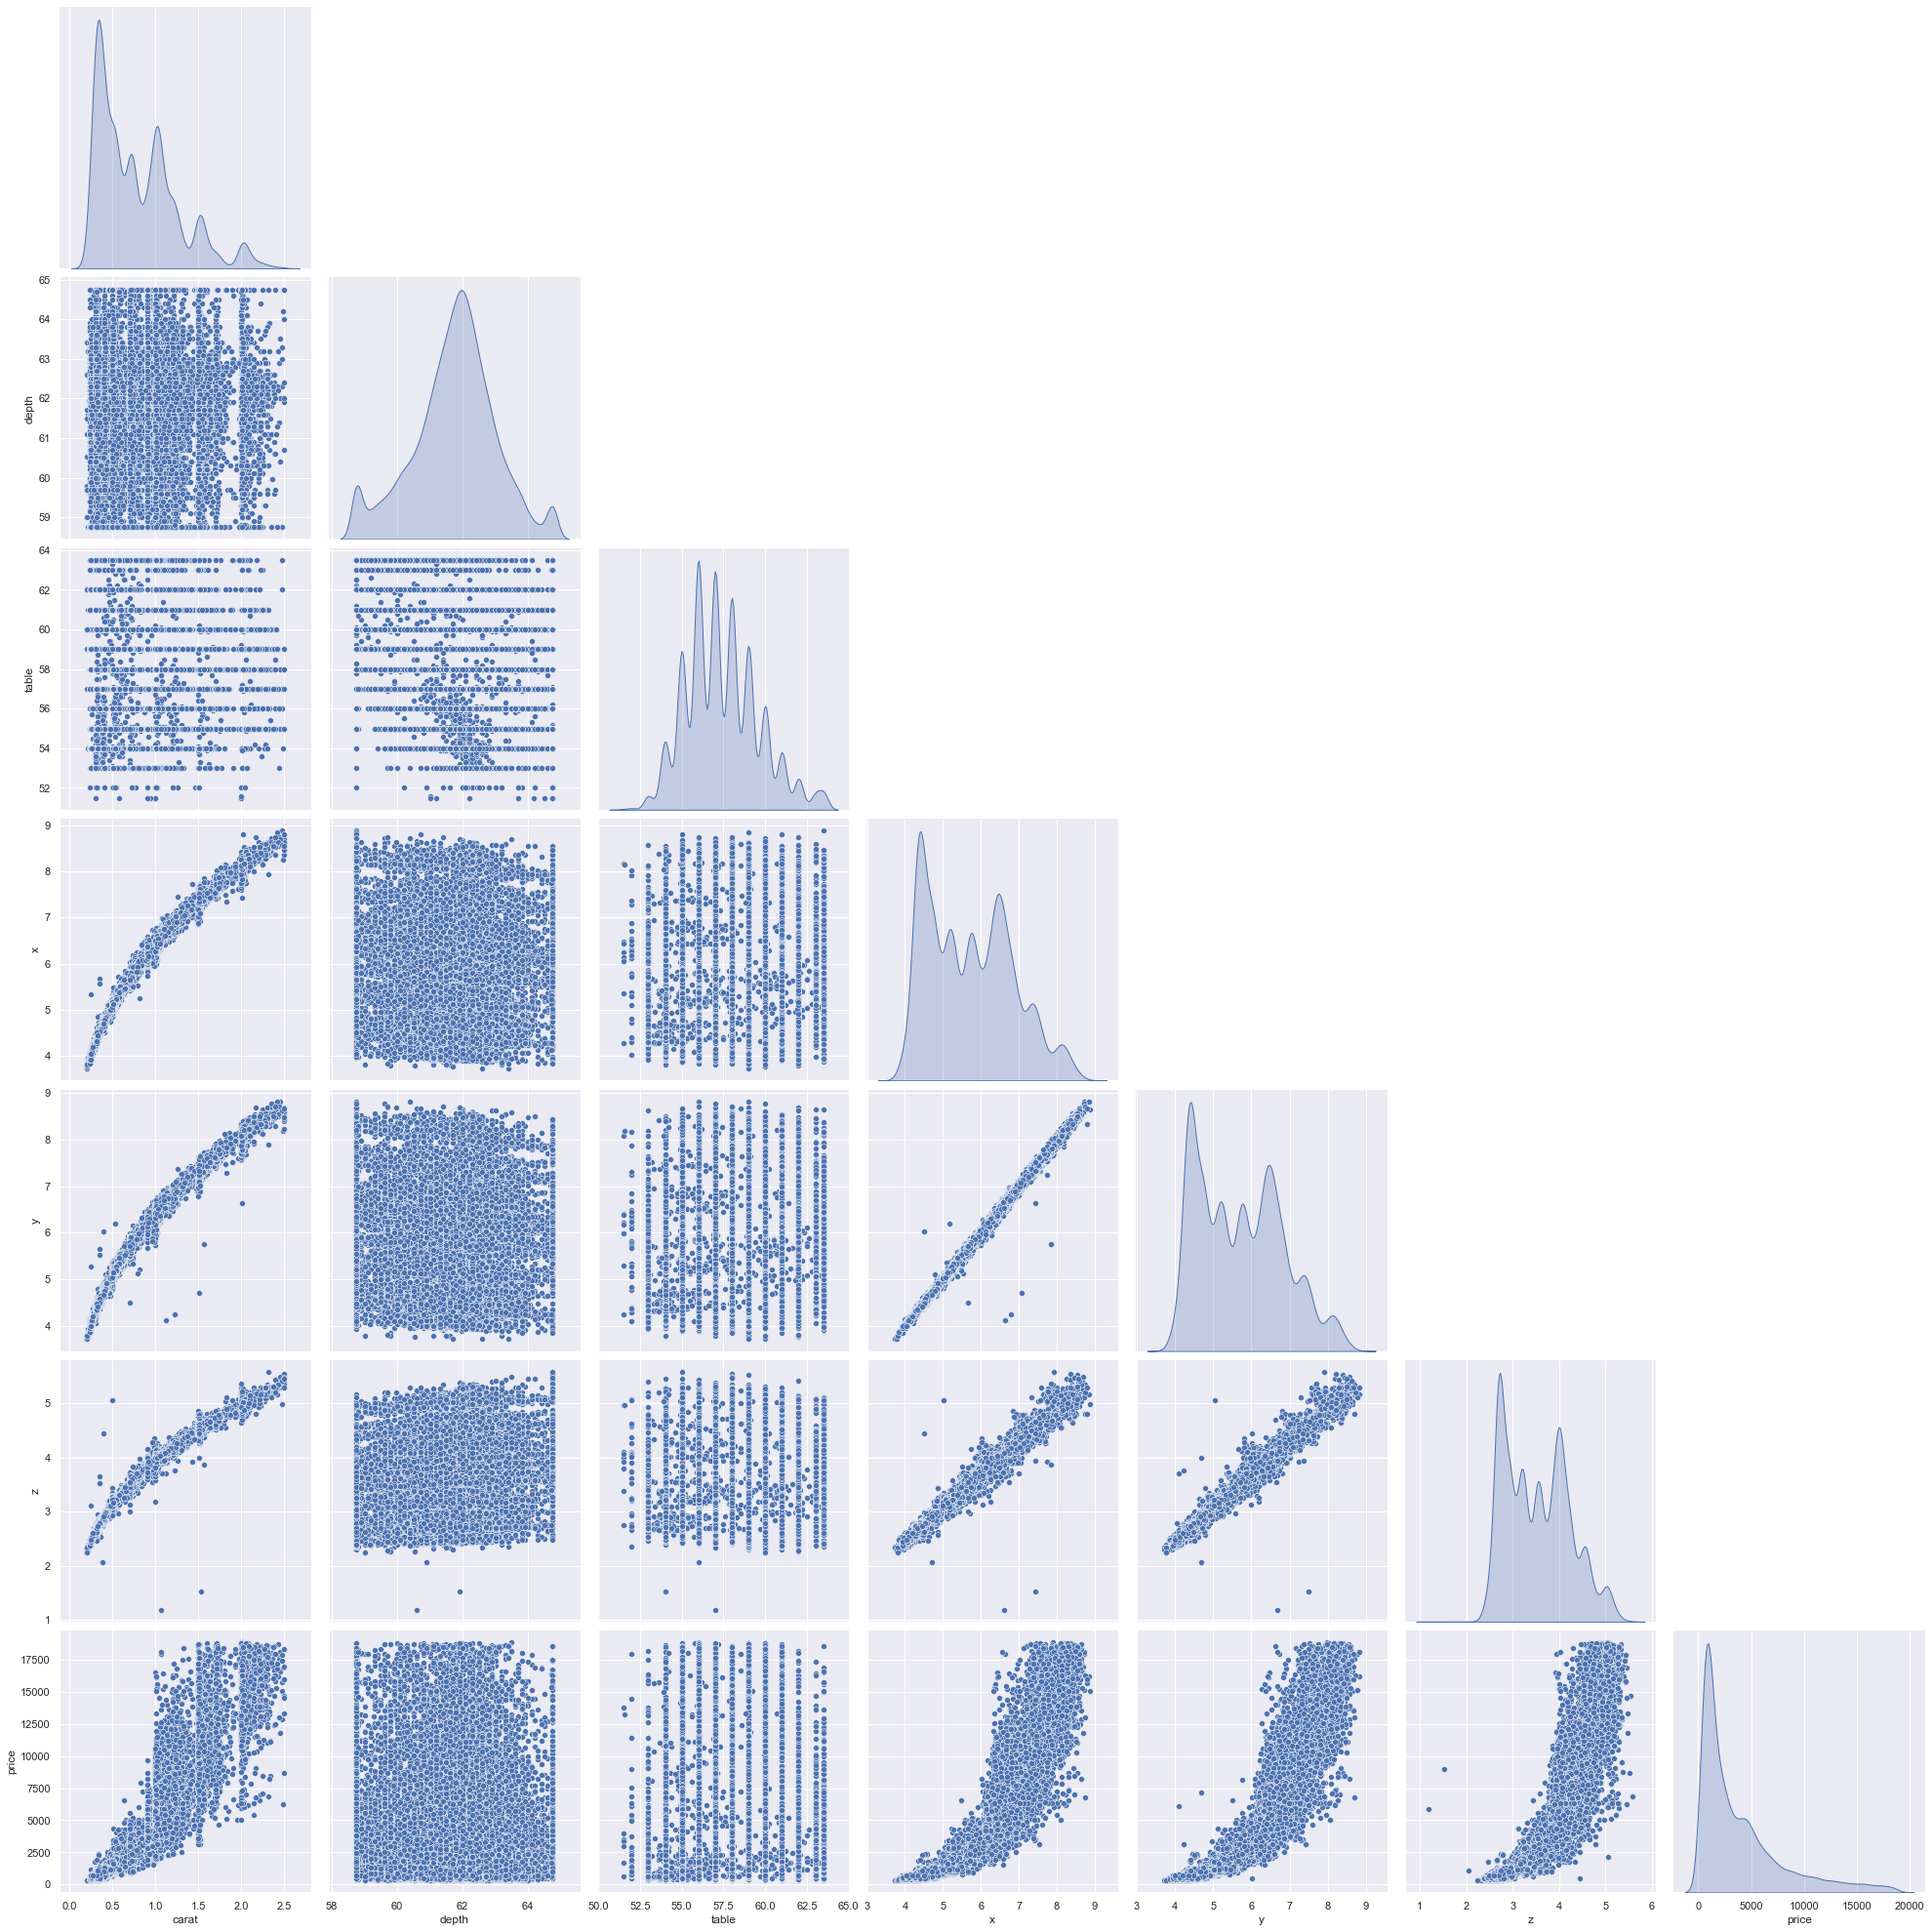

In [107]:
print('\033[1m'," Bivariate Analysis: Pairplot for the Numerical features",'\033[0m')
sns.pairplot(data = Numerical,height=4,diag_kind='kde',corner=True);

  Bivariate Analysis: Correlation plot on all Independent variables 


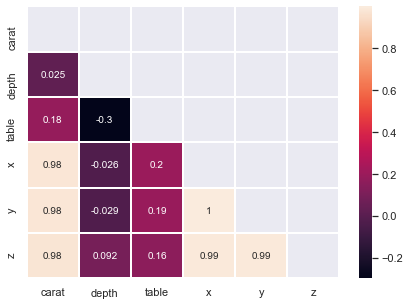

In [112]:
# Correlation heatmap: B/w the Independent variables
plt.figure(figsize=(7,5))
mask = np.triu(np.ones_like(Numerical[['carat','depth','table','x','y','z']].corr(),dtype=np.bool))
sns.heatmap(Numerical[['carat','depth','table','x','y','z']].corr(),annot=True,mask=mask,linewidths=1,linecolor='w')
print('\033[1m'," Bivariate Analysis: Correlation plot on all Independent variables",'\033[0m')

  Bivariate Analysis: Correlation plot on Carat, Depth, Table and x 


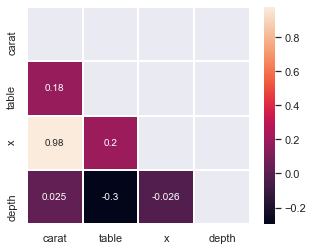

In [115]:
# Correlation heatmap : B/w the Independent variables after removing Height and Width.

plt.figure(figsize=(5,4))
mask = np.triu(np.ones_like(Numerical[['carat','table','x','depth']].corr(),dtype=np.bool))

sns.heatmap(Numerical[['carat','table','x','depth']].corr(),annot=True,mask=mask,linewidths=1,linecolor='w')
print('\033[1m'," Bivariate Analysis: Correlation plot on Carat, Depth, Table and x",'\033[0m')

  Bivariate Analysis: Correlation plot B/w Independent and dependent variables 


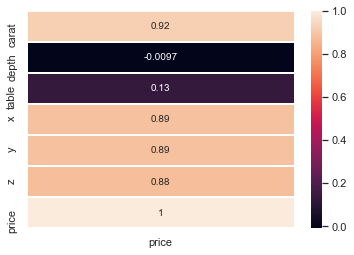

In [116]:
# Correlation heatmap : B/w the Independent variables and dependent variable:

sns.heatmap(Numerical.corr()[['price']],annot=True,linewidths=1,linecolor='w')
print('\033[1m'," Bivariate Analysis: Correlation plot B/w Independent and dependent variables",'\033[0m')

In [128]:
def Bivariate_analysis_num(column,bins):
    
    plt.figure(figsize=(7,10))
    plt.subplot(1,1,1)    
    print('\033[1m',"Average Price for the column",'\033[0m',df_EDA.groupby(column)['price'].mean())
    print('\033[1m',"Boxplot for the " +column,"column",'\033[0m')
    
    ax = sns.boxplot(y=df['price'],x=Discrete[column])

    plt.show()

 Average Price for the column  cut
Fair         4433.732468
Good         3888.400823
Ideal        3437.010646
Premium      4506.199010
Very Good    4005.926850
Name: price, dtype: float64
 Boxplot for the cut column 


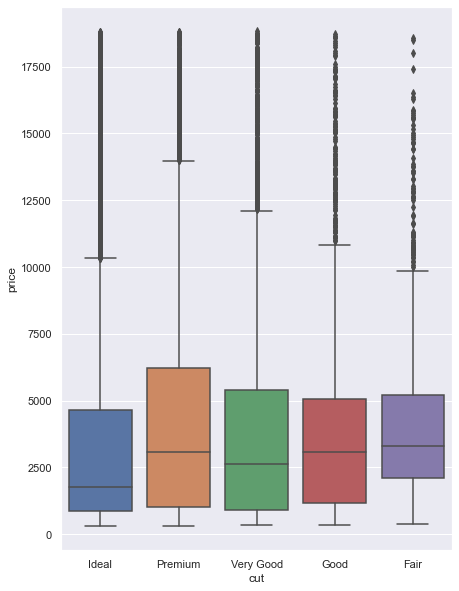

 Average Price for the column  color
D    3177.728007
E    3068.537444
F    3694.299323
G    3989.315817
H    4427.376073
I    5041.816661
J    5203.817672
Name: price, dtype: float64
 Boxplot for the color column 


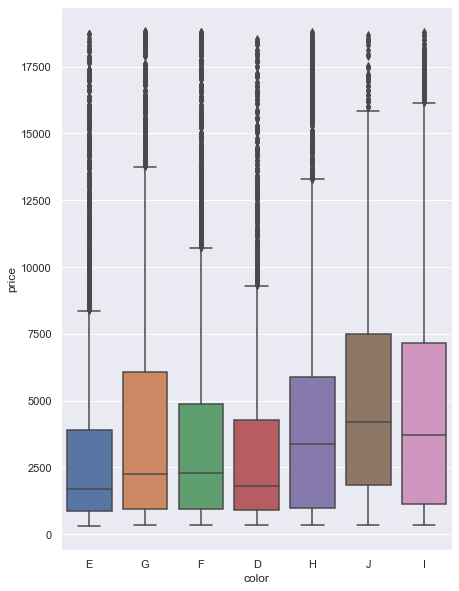

 Average Price for the column  clarity
I1      3560.567335
IF      2734.222595
SI1     3982.231297
SI2     4975.903183
VS1     3831.973099
VS2     3964.008365
VVS1    2502.874388
VVS2    3265.279336
Name: price, dtype: float64
 Boxplot for the clarity column 


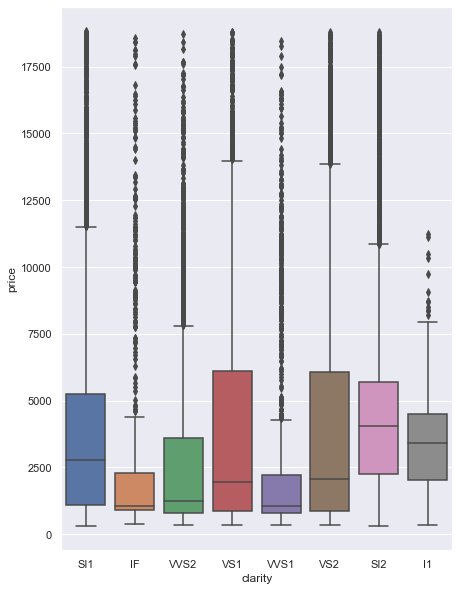

In [129]:
for i in Discrete:
    Bivariate_analysis_num(i,20)  

  Joint plot for Depth and Table  


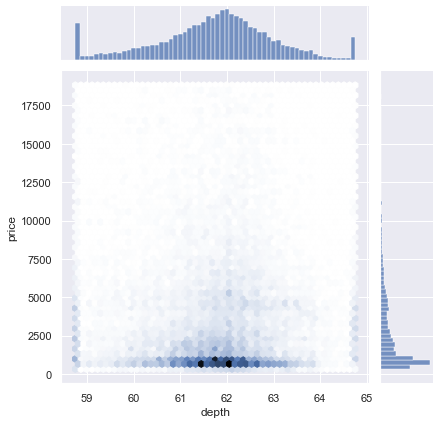

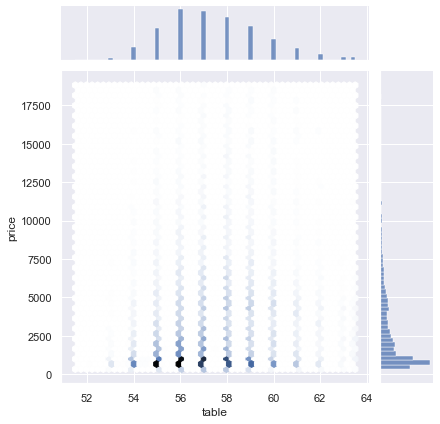

In [130]:
sns.jointplot(x='depth',y='price',data=Numerical,kind='hex')
sns.jointplot(x='table',y='price',data=Numerical,kind='hex')
print('\033[1m'," Joint plot for Depth and Table ",'\033[0m')

#### Model Preprocessing: 
1. Model 1: Single Linear regression model on Unscaled data with Label encoding - Carat
2. Model 2: Multiple Linear regression model on data with PCA components.
3. Model 3: Multiple Linear regression model on Unscaled data with One hot encoding
4. Model 4: Multiple Linear regression model using Sklearn library. (Unscaled data with One hot Encoding)
5. Model 5: Multiple Linear regression model using Sklearn library. (on PCA Components)

In [75]:
# Label Encoding for Model 1 and Model 2:

In [135]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('always')

In [141]:
# df['clarity']=np.where(df['clarity'] =='FL', '1', df['clarity'])
# df['clarity']=np.where(df['clarity'] =='IF', '2', df['clarity'])
# df['clarity']=np.where(df['clarity'] =='VVS1', '3', df['clarity'])
# df['clarity']=np.where(df['clarity'] =='VVS2', '4', df['clarity'])
# df['clarity']=np.where(df['clarity'] =='VS1', '5', df['clarity'])
# df['clarity']=np.where(df['clarity'] =='VS2', '6', df['clarity'])
# df['clarity']=np.where(df['clarity'] =='SI1', '7', df['clarity'])
# df['clarity']=np.where(df['clarity'] =='SI2', '8', df['clarity'])
# df['clarity']=np.where(df['clarity'] =='I1', '9', df['clarity'])
# df['clarity']=np.where(df['clarity'] =='I2', '10', df['clarity'])
# df['clarity']=np.where(df['clarity'] =='I3', '11', df['clarity'])

In [142]:
# df['color']=np.where(df['color'] =='D', '1', df['color'])
# df['color']=np.where(df['color'] =='E', '2', df['color'])
# df['color']=np.where(df['color'] =='F', '3', df['color'])
# df['color']=np.where(df['color'] =='G', '4', df['color'])
# df['color']=np.where(df['color'] =='H', '5', df['color'])
# df['color']=np.where(df['color'] =='I', '6', df['color'])
# df['color']=np.where(df['color'] =='J', '7', df['color'])

In [143]:
# df['cut'] = np.where(df['cut'] =='Ideal', '1', df['cut'])
# df['cut'] = np.where(df['cut'] =='Premium', '2', df['cut'])
# df['cut'] = np.where(df['cut'] =='Very Good', '3', df['cut'])
# df['cut'] = np.where(df['cut'] =='Good', '4', df['cut'])
# df['cut'] = np.where(df['cut'] =='Fair', '5', df['cut'])

In [152]:

df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,1,2,7,62.1,58.0,4.27,4.29,2.66,499
1,0.33,2,4,2,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,4,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,1,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,1,3,3,60.4,59.0,4.35,4.43,2.65,779


In [148]:
# Model 2

df_PCA = df.copy()

In [153]:
sc = StandardScaler()

scaled_pca = df_PCA.iloc[:,0:9]
scaled_pca = pd.DataFrame(sc.fit_transform(scaled_pca),columns=list(scaled_pca))

In [178]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
reduced_data = pca.fit_transform(scaled_pca)
df_pca = pd.DataFrame(pca.components_,columns=list(scaled_pca))
print('\033[1m','Explained variance','\033[0m',pca.explained_variance_ratio_.sum())

 Explained variance  0.957291336697922


  Heatmap showing the components and their captured variances  


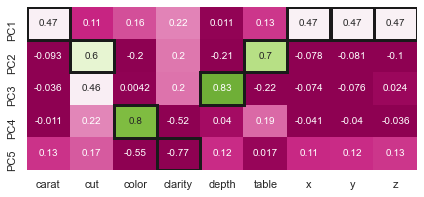

In [155]:
from matplotlib.patches import Rectangle
# heatmap showing the components and their captured variances of various features.
fig,ax = plt.subplots(figsize=(7,3), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca, annot=True, vmax=1.0, vmin=0, cmap='PiYG', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5'])

column_max = df_pca.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca.columns):
    position = df_pca.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='k', lw=3))

print('\033[1m'," Heatmap showing the components and their captured variances ",'\033[0m')

In [156]:
PCA_data = pd.DataFrame(reduced_data,columns=[['CaratDimensions','Cut&Table','Depth','Color','Clarity']])

In [157]:
# Model 3 : One hot encoding:

In [158]:
df_onehot = df_EDA.copy()

In [159]:
Clarity = pd.get_dummies(df_onehot['clarity'],drop_first=False)

In [160]:
Color = pd.get_dummies(df_onehot['color'],drop_first=False)

In [161]:
Cut = pd.get_dummies(df_onehot['cut'],drop_first=False)

In [162]:
df_onehot=pd.concat((df_onehot.drop(['clarity','color','cut'],
                                  axis=1),Clarity,Color,Cut),axis=1)

In [163]:
# Model1 :
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,1,2,7,62.1,58.0,4.27,4.29,2.66,499
1,0.33,2,4,2,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,4,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,1,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,1,3,3,60.4,59.0,4.35,4.43,2.65,779


In [164]:
# Model2 :
PCA_data.head()

,CaratDimensions,Cut&Table,Depth,Color,Clarity
0,-2.405918,0.295146,0.056269,-1.084138,-0.720467
1,-2.609349,0.163650,-1.012283,1.587378,1.065041
2,0.424955,1.091088,0.130593,0.246349,1.780256
3,-1.928438,-0.778268,-0.379175,-0.224633,0.037438
4,-2.707782,0.276070,-1.664342,0.680001,0.706124


In [165]:
# Model 3:
df_onehot.head()

,carat,depth,table,x,y,z,price,I1,IF,SI1,...,F,G,H,I,J,Fair,Good,Ideal,Premium,Very Good
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [166]:
df_onehot_sc = pd.DataFrame(sc.fit_transform(df_onehot),columns=list(df_onehot))
df_onehot_sc.head()

,carat,depth,table,x,y,z,price,I1,IF,SI1,...,F,G,H,I,J,Fair,Good,Ideal,Premium,Very Good
0,-1.056237,0.285312,0.262972,-1.300864,-1.293865,-1.266132,-0.856397,-0.11468,-0.185459,1.759717,...,-0.461690,-0.515923,-0.422905,-0.337478,-0.236663,-0.171709,-0.315218,1.220239,-0.585797,-0.536842
1,-0.991958,-0.747386,0.262972,-1.166448,-1.140444,-1.208100,-0.734514,-0.11468,5.392015,-0.568273,...,-0.461690,1.938272,-0.422905,-0.337478,-0.236663,-0.171709,-0.315218,-0.819512,1.707076,-0.536842
2,0.229336,0.364750,1.190696,0.285243,0.357675,0.358762,0.598661,-0.11468,-0.185459,-0.568273,...,-0.461690,-0.515923,-0.422905,-0.337478,-0.236663,-0.171709,-0.315218,-0.819512,-0.585797,1.862747
3,-0.799122,-0.111880,-0.664751,-0.808006,-0.833600,-0.830892,-0.709886,-0.11468,-0.185459,-0.568273,...,2.165956,-0.515923,-0.422905,-0.337478,-0.236663,-0.171709,-0.315218,1.220239,-0.585797,-0.536842
4,-1.034810,-1.065139,0.726834,-1.229175,-1.167518,-1.280640,-0.786032,-0.11468,-0.185459,-0.568273,...,2.165956,-0.515923,-0.422905,-0.337478,-0.236663,-0.171709,-0.315218,1.220239,-0.585797,-0.536842


#### Multi collinearity:

In [168]:
# VIF on all independent variables

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[['carat','depth','table','x','y','z']].values, i) 
                      for i in range(df[['carat','depth','table','x','y','z']].shape[1])]
vif["features"] = df[['carat','depth','table','x','y','z']].columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
3,10440.954010,x
4,9363.013655,y
5,2911.702415,z
1,944.738612,depth
2,718.826398,table
0,101.251949,carat


In [169]:
# VIF after removing y,z

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[['carat','table','x','depth']].values, i) 
                      for i in range(df[['carat','table','x','depth']].shape[1])]
vif["features"] = df[['carat','table','x','depth']].columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
2,607.602689,x
1,519.609376,table
3,507.119806,depth
0,85.254804,carat


In [170]:
# VIF on scaled data

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(scaled_pca[['carat','depth','table','x']].values, i) 
                      for i in range(scaled_pca[['carat','depth','table','x']].shape[1])]
vif["features"] = scaled_pca[['carat','depth','table','x']].columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
0,26.862021,carat
3,26.857607,x
1,1.170856,depth
2,1.144604,table


In [171]:
# VIF on Principal components

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(PCA_data.values, i) 
                      for i in range(PCA_data.shape[1])]
vif["features"] = PCA_data.columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
4,1.0,"(Clarity,)"
2,1.0,"(Depth,)"
3,1.0,"(Color,)"
0,1.0,"(CaratDimensions,)"
1,1.0,"(Cut&Table,)"


1. The VIF value on original unscaled data is very high.
2. Depth is retained and height and width are removed to check values. The VIF ar still very high.
3. VIF on scaled data is less but not within limits. A value below 5 is expected. 
4. VIF on the PCA components are very low and within limits.
5. For the given data, multi collinearity can be removed by PCA technique. 

In [172]:
# exporting data to Second notebook for Models

df.to_csv('Model1.csv')
PCA_data.to_csv('Model2.csv')
df_onehot.to_csv('Model3.csv')

### Models executed in MariaJasmine_Project_PM_Q1_LinearRegressionModels